<a href="https://colab.research.google.com/github/Darkandpure/Data-mining-for-transients-/blob/main/Data_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Here im reading VLASS Quick Look data of epoch1
- I have tailored and selected the columns i need from 70 columns in main table
- from csv i have converted the file to apache parquet format (suitable for big data operations)

In [6]:
file_path = "/home/master1/Downloads/topcat_data /quick_look1.parquet"
# Read the Parquet file
df = pd.read_parquet(file_path)

# lets see the first 5 rows

# New section

In [7]:
df.head()

,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,Source_type,QL_cutout,NN_dist,BMAJ,BMIN,BPA,Best_neuron_y,Best_neuron_x,Neuron_dist,P_sidelobe
0,VLASS1QLCIR J000000.04+800045.6,90,125,0.000177,80.012667,0.000075,0.000112,0.818652,0.318866,0.752668,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,4.090731,3.292111,2.205925,10.809265,2.0,0.0,4.682553,0.00
1,VLASS1QLCIR J000000.05+441010.5,4,8,0.000222,44.169596,0.000184,0.000107,5.166948,1.273459,1.068693,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,23.102499,2.838859,2.162387,41.666328,8.0,5.0,3.936261,0.22
2,VLASS1QLCIR J000000.07-062930.6,63,94,0.000296,-6.491848,0.000085,0.000076,1.905655,0.443845,1.204416,...,SC,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,104.898297,3.594396,2.223308,31.344944,0.0,9.0,2.677271,-1.00
3,VLASS1QLCIR J000000.08+190239.5,36,34,0.000373,19.044331,0.000042,0.000050,4.456763,0.930580,2.734357,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,2.345142,1.928372,35.547150,1.0,6.0,2.226653,-1.00
4,VLASS1QLCIR J000000.08+275057.9,-6,55,0.000369,27.849437,0.000000,0.000000,0.000000,0.000000,1.149879,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,2.957121,2.348967,80.226173,2.0,9.0,6.467846,-1.00


# Now the last 5 rows

In [8]:
df.tail()

,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,Source_type,QL_cutout,NN_dist,BMAJ,BMIN,BPA,Best_neuron_y,Best_neuron_x,Neuron_dist,P_sidelobe
3381272,VLASS1QLCIR J235959.94+361624.4,1,2,359.999759,36.273452,0.000031,0.000016,6.216199,0.578085,4.353328,...,SC,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,478.236496,3.061541,2.152801,-81.623146,0.0,4.0,1.989009,-1.00
3381273,VLASS1QLCIR J235959.94-313449.4,-25,27,359.999775,-31.580402,0.000000,0.000000,0.000000,0.000000,3.961394,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,3.147471,2.077380,-15.430664,6.0,8.0,7.031823,-1.00
3381274,VLASS1QLCIR J235959.95-311435.2,-85,149,359.999793,-31.243116,0.000000,0.000000,0.000000,0.000000,1.217973,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,3.399027,2.039737,19.119400,6.0,9.0,6.001803,-1.00
3381275,VLASS1QLCIR J235959.96+333602.9,-1,5,359.999836,33.600828,0.000000,0.000000,0.000000,0.000000,0.891518,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,3.008391,2.276255,-75.706650,0.0,9.0,3.693624,-1.00
3381276,VLASS1QLCIR J235959.99-034346.5,0,2,359.999999,-3.729597,0.000069,0.000083,2.509144,0.836231,2.151774,...,N/,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,183.142614,3.038292,2.184448,14.214737,7.0,7.0,6.471985,0.98


In [9]:
x =  df['Peak_flux']
print(x)

0          0.752668
1          1.068693
2          1.204416
3          2.734357
4          1.149879
             ...   
3381272    4.353328
3381273    3.961394
3381274    1.217973
3381275    0.891518
3381276    2.151774
Name: Peak_flux, Length: 3381277, dtype: float64


# Now lets see the peak brigtness of the catalogue data vs quality flag = 0

In [45]:

# Separate the data into two groups based on Quality_flag
all_components = df['Peak_flux'].sort_values()
quality_flag_0_components = df[df['Quality_flag'] == 0]['Peak_flux'].sort_values()


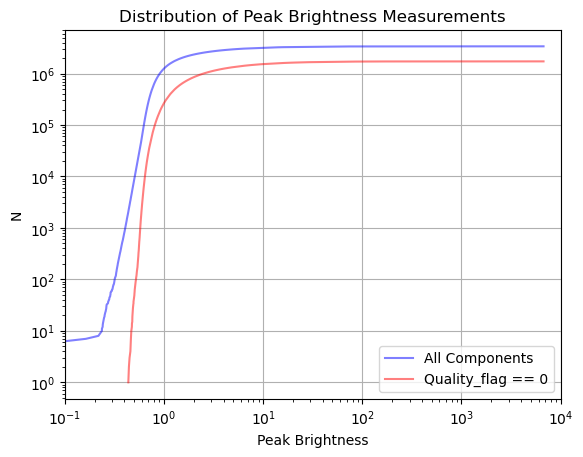

In [46]:
# Create the y-axis values for the line plot
y_all = np.arange(1, len(all_components)+1)
y_quality_flag_0 = np.arange(1, len(quality_flag_0_components)+1)

# Plot the line plots for all components and Quality_flag == 0 components
plt.plot(all_components, y_all, color='blue', alpha=0.5, label='All Components')
plt.plot(quality_flag_0_components, y_quality_flag_0, color='red', alpha=0.5, label='Quality_flag == 0')
plt.xlabel('Peak Brightness')
plt.ylabel('N')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 10**4)
plt.title('Distribution of Peak Brightness Measurements')
plt.legend()
plt.grid(True)
plt.show()

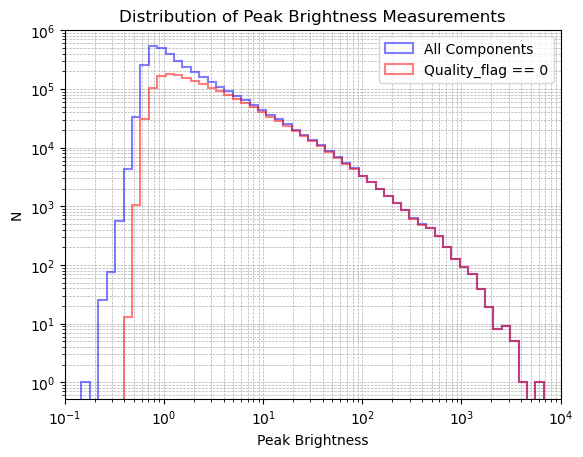

In [47]:
import numpy as np

# Assuming you have the lists all_components and quality_flag_0_components

# Define the bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(10**4), 60)  # 50 logarithmically spaced bins from 0.1 to 10^4

# Plot histograms
plt.hist(all_components, bins=bins, color='blue', alpha=0.5, label='All Components', histtype='step', linewidth=1.5)
plt.hist(quality_flag_0_components, bins=bins, color='red', alpha=0.5, label='Quality_flag == 0', histtype='step', linewidth=1.5)

# Configure plot details
plt.xlabel('Peak Brightness')
plt.ylabel('N')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 10**4)
plt.title('Distribution of Peak Brightness Measurements')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # The grid will be shown on both major and minor ticks
plt.show()




In [40]:
avefig('peak_dist.png')

<Figure size 640x480 with 0 Axes>

# All components with vs without Qualtity flag(QF) == 0
- Flagged distribution shows a reduced no of faint detections.
- Distribution of all deviates from the
flagged peak brightness by 5mJy/beam.

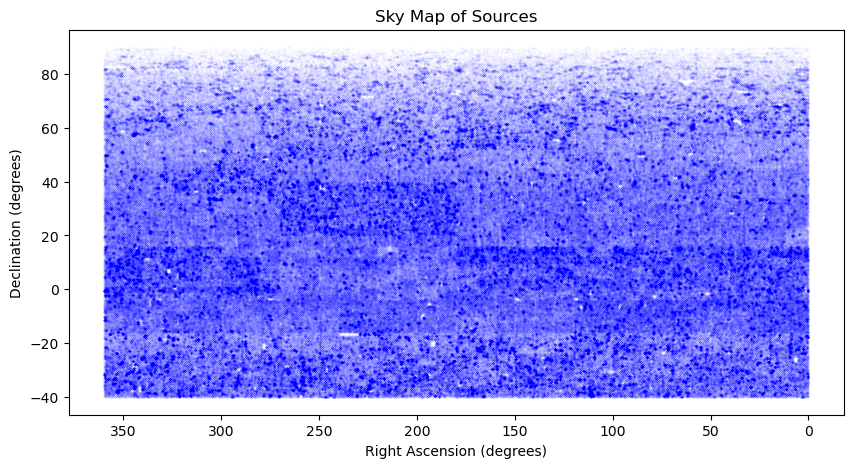

In [12]:
# Create a scatter plot of the Right Ascension (RA) and Declination (DEC)
plt.figure(figsize=(10, 5))
plt.scatter(df['RA'], df['DEC'], s=0.0001, color='blue')
plt.gca().invert_xaxis()  # invert the x-axis to match the sky view
plt.title('Sky Map of Sources')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()


# plot showing the locations of the sources in the sky.
- The x-axis is inverted to match the view of the sky because Right Ascension decreases as you go from East to West.

In [13]:
# Filter the data
filtered_df = df[(df['Quality_flag'].isin([0])) &
                 (df['Duplicate_flag'] < 2) &
                 (df['Isl_rms'] < 0.2) & df['Isl_rms'] > 0.1  ]
filtered_df.head()
filtered_df.__len__()




1511129

/tmp/ipykernel_10179/2899967741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RA_rad'] = np.deg2rad(filtered_df['RA'])
/tmp/ipykernel_10179/2899967741.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DEC_rad'] = np.deg2rad(filtered_df['DEC'])


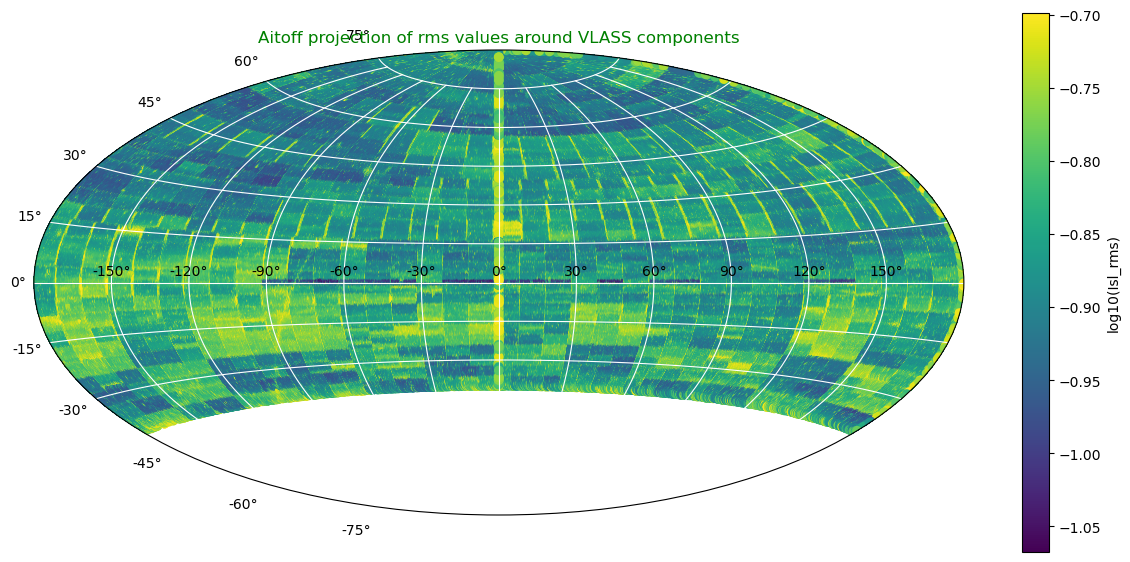

In [14]:
# Convert Right Ascension from degrees to radians
filtered_df['RA_rad'] = np.deg2rad(filtered_df['RA'])

# Wrap-around the Right Ascension so it goes from -180 to +180 instead of 0 to 360
filtered_df.loc[filtered_df['RA_rad'] > np.pi, 'RA_rad'] -= 2. * np.pi

# Convert Declination from degrees to radians
filtered_df['DEC_rad'] = np.deg2rad(filtered_df['DEC'])

# Make the Aitoff projection plot
plt.figure(figsize=(15, 7))
plt.subplot(111, projection='aitoff')
plt.title('Aitoff projection of rms values around VLASS components', color = "g")
plt.grid(True, color = "white")
plt.scatter(filtered_df['RA_rad'], filtered_df['DEC_rad'],
            c=np.log10(filtered_df['Isl_rms']), cmap='viridis')
plt.colorbar(label='log10(Isl_rms)')
plt.show()

# Figure 4. Aitoff projection in equatorial (J2000) coordinates of the rms values found around all VLASS components

- For clarity only Isl rms < 200 µJy/beam are shown and on a log10 scale. Additionally this is limited to components
with Quality flag == 0 and Duplicate flag < 2.
- From this plot it is clear that the depth of the Quick Look imaging is not homogeneous.
- Key features in this plot include the Galactic plane at low Galactic longitudes, the checker-board pattern at southern latitudes, high noise at the East-West boundaries of tiles, and a region of high noise at DEC ∼ +85o in the Western
hemisphere (12 < RA < 24 hr).

# Lets match VLASS1.1 with COSMOS-VLA for flux calibration
- Done using top cat with an max error of 1 arcsec match result- 143, while in paper they got 132.




Now Lets plot the ratio of VLASS to COSMOS flux density measurements for the 108 matched components as a function of peak brightness in VLASS.




# Reading VLAss_cosmos pair matched

In [15]:
file_path1 = "/home/master1/Downloads/topcat_data /vla_cosmos_1.parquet"

vc = pd.read_parquet(file_path1)

In [16]:
vc.head()

,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,DEJ2000,e_DEJ2000,Flux,e_Flux,rms,SNR,Npix,Res,Multi,Separation
0,VLASS1QLCIR J095709.34+020941.0,60,61,149.288929,2.161390,0.000004,0.000004,12.025210,0.262032,11.527386,...,2.161331,0.010,13400.0,670.0,28.700001,385.000000,104,1,0,0.260068
1,VLASS1QLCIR J095709.84+015457.4,35,34,149.291024,1.915962,0.000063,0.000101,0.995984,0.307186,0.746346,...,1.915946,0.021,1190.0,64.0,22.100000,29.000000,102,1,0,0.114501
2,VLASS1QLCIR J095710.88+020929.8,59,60,149.295367,2.158305,0.000088,0.000093,3.759338,0.698852,0.988134,...,2.158297,0.076,2820.0,140.0,21.400000,7.130000,332,1,0,0.105205
3,VLASS1QLCIR J095712.94+021436.7,57,58,149.303938,2.243550,0.000026,0.000034,1.034792,0.199995,1.268585,...,2.243416,0.013,1060.0,56.0,17.000000,60.099998,53,1,0,0.513227
4,VLASS1QLCIR J095716.83+020106.9,-7,57,149.320128,2.018593,0.000000,0.000000,0.000000,0.000000,0.810236,...,2.018599,0.012,1110.0,61.0,12.100000,91.400002,52,0,0,0.196053


# Reading cosmos_VLAss pair matched
- cosmsos table details : https://cdsarc.cds.unistra.fr/ftp/J/A+A/602/A1/ReadMe

In [17]:
file_path2 = "/home/master1/Downloads/topcat_data /cosmos_vla_1.parquet"
cv = pd.read_parquet(file_path2)


In [18]:
cv.head()

,_RAJ2000,_DEJ2000,ID,COSMOSVLA3,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Flux,e_Flux,...,QL_cutout,NN_dist,BMAJ,BMIN,BPA,Best_neuron_y,Best_neuron_x,Neuron_dist,P_sidelobe,Separation
0,149.288886,2.161331,78,J095709.33+020940.7,149.288886,0.010,2.161331,0.010,13400.0,670.0,...,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,25.686179,2.763393,2.473086,19.852388,0.0,4.0,2.517610,-1.0000,0.260068
1,149.290996,1.915946,1110,J095709.83+015457.4,149.290996,0.021,1.915946,0.021,1190.0,64.0,...,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,189.922677,2.715315,2.382455,-1.783813,3.0,8.0,4.325272,0.0000,0.114501
2,149.295339,2.158297,4979,J095710.88+020929.8,149.295339,0.076,2.158297,0.076,2820.0,140.0,...,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,25.686179,2.763393,2.473086,19.852388,8.0,6.0,4.114350,0.1875,0.105205
3,149.303987,2.243416,536,J095712.95+021436.2,149.303987,0.013,2.243416,0.013,1060.0,56.0,...,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,268.594634,2.763393,2.473086,19.852388,2.0,8.0,2.373570,0.0000,0.513227
4,149.320074,2.018599,355,J095716.81+020106.9,149.320074,0.012,2.018599,0.012,1110.0,61.0,...,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/ca...,-99.000000,2.763393,2.473086,19.852388,2.0,5.0,3.198188,-1.0000,0.196053


In [19]:
S_vlass = vc["Total_flux"]*10**3

 - converted to mJy

In [20]:
s_cosmos = cv["Flux"]

In [21]:
Flux_ratio = S_vlass/s_cosmos
Flux_ratio.value_counts()

1.108512    1
0.897404    1
0.836961    1
1.333099    1
0.976219    1
           ..
0.994797    1
0.937488    1
0.883018    1
0.870199    1
1.395178    1
Length: 143, dtype: int64

In [22]:
Flux_ratio = S_vlass/s_cosmos
Flux_ratio.value_counts()

1.108512    1
0.897404    1
0.836961    1
1.333099    1
0.976219    1
           ..
0.994797    1
0.937488    1
0.883018    1
0.870199    1
1.395178    1
Length: 143, dtype: int64

In [23]:
S_peak = vc["Peak_flux"]

# Comparission to the vlass/cosmos flux ratio vs peak flux of vlass


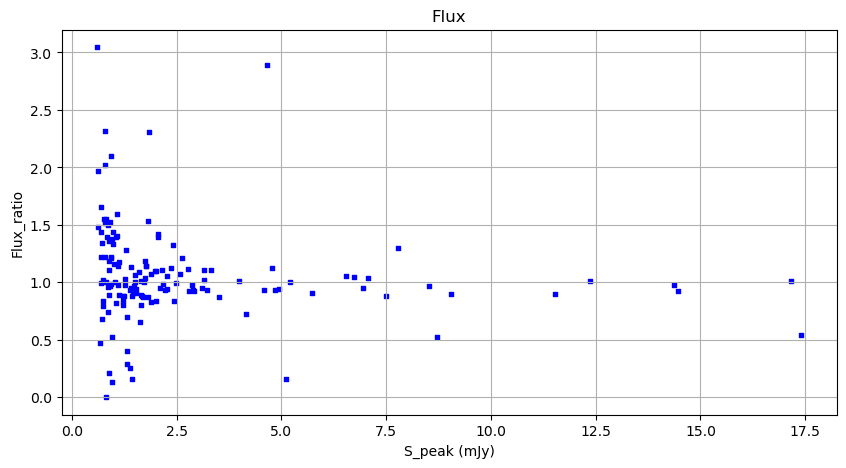

In [41]:


# Create a scatter plot of the Right Ascension (RA) and Declination (DEC)
plt.figure(figsize=(10, 5))
plt.scatter(S_peak, Flux_ratio, s=5, color='blue', marker='s')  # Use marker='s' for square markers
 # Invert the x-axis to match the sky view
plt.grid(True)  # Add a grid
plt.title('Flux')
plt.xlabel('S_peak (mJy)')
plt.ylabel('Flux_ratio')
plt.show()


- shows deviation of flux betwn both 
 - median value is 0.95
 - below 3 mJy a scatter can be seen

## Lets read WENSS-VLASS data 

In [25]:
import pandas as pd 
file_path = ("/home/master1/Downloads/topcat_data /WENSS_VLASS")

wenns = pd.read_parquet(file_path)
wenns.__len__()

10975

In [26]:
wenns.head()


,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,_DEJ2000,WENSS,RAB1950,DEB1950,Sp,Si,MajAxis,MinAxis,PA_2,Separation
0,VLASS1QLCIR J140939.07+712752.5,15,26,212.412803,71.464602,1.769909e-05,7.327463e-06,4.596965,0.239036,3.839188,...,71.468266,WNB1408+7142,14 08 59.55,+71 42 12.2,18,32,103,52,66,35.390836
1,VLASS1QLCIR J141026.73+710119.7,11,14,212.611381,71.022139,2.759533e-07,9.032874e-07,126.125118,0.471472,118.053940,...,71.021891,WNB1409+7115,14 09 38.17,+71 15 23.7,1271,1317,0,0,0,1.017559
2,VLASS1QLCIR J141030.17+705824.7,9,18,212.625720,70.973552,5.267532e-05,3.777380e-05,15.780943,0.966445,2.452418,...,70.973092,WNB1409+7112,14 09 41.21,+71 12 27.9,102,94,0,0,0,1.670799
3,VLASS1QLCIR J141037.35+712157.1,10,13,212.655636,71.365875,5.306040e-05,2.611313e-05,1.444988,0.239036,1.281512,...,71.368692,WNB1409+7136,14 09 49.04,+71 36 11.8,46,42,0,0,0,13.587710
4,VLASS1QLCIR J141037.45+720846.3,23,23,212.656079,72.146221,4.619085e-06,1.634711e-05,15.567940,0.411591,7.831902,...,72.145881,WNB1409+7222,14 09 56.15,+72 22 49.5,121,130,0,0,0,1.227716


In [27]:
wenns.tail()

,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,_DEJ2000,WENSS,RAB1950,DEB1950,Sp,Si,MajAxis,MinAxis,PA_2,Separation
10970,VLASS1QLCIR J203027.25+722428.6,43,45,307.613544,72.407958,0.000022,0.000043,9.698904,0.599114,2.539387,...,72.407322,WNB2030+7214,20 30 39.74,+72 14 14.4,36,34,0,0,0,2.671696
10971,VLASS1QLCIR J203031.76+713816.4,36,38,307.632334,71.637898,0.000020,0.000017,8.147551,0.481025,4.510600,...,71.639532,WNB2030+7128,20 30 35.30,+71 28 10.4,94,80,0,0,0,8.422148
10972,VLASS1QLCIR J203038.11+721814.7,42,44,307.658823,72.304097,0.000025,0.000041,1.332762,0.216622,1.351667,...,72.305818,WNB2030+7208,20 30 49.35,+72 08 08.4,28,15,0,0,0,6.234605
10973,VLASS1QLCIR J203212.20+724016.4,37,38,308.050872,72.671235,0.000017,0.000021,3.494830,0.269435,2.834439,...,72.669509,WNB2032+7228,20 32 29.66,+72 29 52.0,32,40,0,0,0,17.443087
10974,VLASS1QLCIR J203226.23+723821.3,36,36,308.109302,72.639270,0.000035,0.000074,0.958436,0.258903,0.842857,...,72.642021,WNB2032+7228,20 32 40.69,+72 28 12.4,65,53,0,0,0,10.950540


In [28]:

filtered_s_min = wenns[(wenns['Sp'] >=20 ) & (wenns["Peak_flux"] >=3 * 0.85*0.87 )& (wenns["Duplicate_flag"] < 2)  & (wenns["Quality_flag"].isin([0,4]) ) & (wenns["DC_Maj"] <= 1  )   ]
filtered_s_min.__len__()

1606

- Cross match with wenss comes arround  1606



- in paper 1636

- dont know actually why its comming less. 

In [29]:
filtered_s_min.to_parquet("/home/master1/Downloads/topcat_data /wenss_vlass.parquet")

- when took isolation radious or search radious of 1.75 arch sec, the cross match of wenss with VLASS comes near 1648

## Reading the VLASS-FIRST cross-match with 2.7" isolation radious 

In [30]:
file_path = "/home/master1/Downloads/topcat_data /FIRST_VLASS"

FV = pd.read_parquet(file_path)

In [31]:
FV.head()

,Component_name,Component_id,Isl_id,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,...,p(S),Fpeak,Fint,Rms,MajAxis,MinAxis,PA_2,N1,N2,Separation
0,VLASS1QLCIR J000000.14-083620.8,-14,81,0.000617,-8.605787,0.000000,0.000000,0.000000,0.000000,0.981682,...,0.014,3.12,4.49,0.140,4.97,2.81,50.299999,None,None,1.067268
1,VLASS1QLCIR J000000.19-040242.4,4,5,0.000806,-4.045123,0.000003,0.000004,34.524996,0.433379,32.160266,...,0.014,105.78,108.54,0.149,1.22,0.47,125.699997,None,None,0.314025
2,VLASS1QLCIR J000000.63+123848.1,87,176,0.002656,12.646717,0.000084,0.000077,0.926569,0.306054,0.853690,...,0.014,1.51,1.32,0.135,1.96,0.00,114.800003,None,None,0.303057
3,VLASS1QLCIR J000001.08+080757.2,3,4,0.004515,8.132556,0.000014,0.000015,4.248928,0.308665,4.155986,...,0.014,8.73,8.31,0.119,0.00,0.00,125.199997,None,None,0.384894
4,VLASS1QLCIR J000001.36+044129.5,3,1,0.005682,4.691536,0.000108,0.000102,5.323927,0.966490,1.263368,...,0.014,4.00,10.17,0.092,13.93,1.60,19.500000,None,None,1.087929


- 581457 Unique values
- no missing values, good to go

In [32]:

filtered_FV= FV[(FV['Fpeak'] >=2 ) & (FV["Peak_flux"] >= 3 * 0.85*0.87  ) & (FV["Duplicate_flag"] < 2)  & (FV["Quality_flag"].isin([0,4]) ) & (FV["DC_Maj"] <= 1  )  ]
filtered_FV.__len__()


85580

- so after Smin <= 2 Number of pair match comes arround 85580
- But in paper its 6189
### Lets save it to plot in topcat

In [33]:
filtered_FV.to_parquet("/home/master1/Downloads/topcat_data /wenss_m3.parquet")